# Portfolio Price Analytics

This iPython notebook serves to provide simple yet important stock price insights using stock portfolio history data from the excel file located in the same directory. It imports real-time stock data using the yahoo-finance python module.  
https://pypi.python.org/pypi/yahoo-finance  

In [1]:
import pandas as pd
import yahoo_finance # https://pypi.python.org/pypi/yahoo-finance, https://github.com/lukaszbanasiak/yahoo-finance
import matplotlib.pyplot as plt 
%matplotlib inline
%pylab inline
#pylab.rcParams['figure.figsize'] = (12, 6)   # Change the size of plots
import seaborn as sns
sns.set(color_codes=True)

#cheat sheets 
# http://www.webpages.uidaho.edu/~stevel/504/Pandas%20DataFrame%20Notes.pdf

Populating the interactive namespace from numpy and matplotlib


In [2]:
#import personal data from portfolio.xlsx
raw_data = pd.read_excel('portfolio.xlsx')
stock_data = raw_data.set_index("stock")
stock_data

,price-paid,quantity
stock,,
BAC,25.00,3
SNAP,25.00,4
TWTR,17.14,1


In [3]:
# Get prices from Yahoo-Finance 
shares = [yahoo_finance.Share(str(stock)) for stock in stock_data.index]
current_prices = [share.get_price() for share in shares]
stock_prices = {str(k): float(v) for k, v in zip(stock_data.index, current_prices)}
print (stock_prices)

{'BAC': 23.03, 'SNAP': 22.759, 'TWTR': 14.99}


In [4]:
df2 = pd.DataFrame({'price_paid' : stock_data['price-paid'], 
                    'current_price': [float(price) for price in current_prices],
                    'quantity' : stock_data['quantity']
                    })

price_differentials = [(x - y) for x, y in zip(df2['current_price'], df2['price_paid'])]
df2.insert(0, 'stock', stock_data.index)
df2.insert(3, 'price_diff', price_differentials)
df2.insert(5, 'values', df2['current_price']*df2['quantity'])
df2.insert(6, 'total_invested', df2['price_paid']*df2['quantity'])
df2.insert(7, 'profit', stock_data['quantity'] * df2['price_diff'])
master_data = df2.set_index('stock')
master_data

,current_price,price_paid,price_diff,quantity,values,total_invested,profit
stock,,,,,,,
BAC,23.030,25.00,-1.970,3,69.090,75.00,-5.910
SNAP,22.759,25.00,-2.241,4,91.036,100.00,-8.964
TWTR,14.990,17.14,-2.150,1,14.990,17.14,-2.150


In [6]:
stock = master_data['values'].sum()
print ('total valuation: ', stock) 

def totalAssets(df3, not_invested): 
    return master_data['total_invested'].sum() + not_invested

buying_power = 7.86
totalAssets = totalAssets(stock_data, buying_power)
print ('total assets: ', totalAssets)

df = pd.DataFrame({'total_assets':  [totalAssets], 
                    'stock_valuation':  [stock]})
df

total valuation:  175.116
total assets:  200.0


,stock_valuation,total_assets
0,175.116,200.0


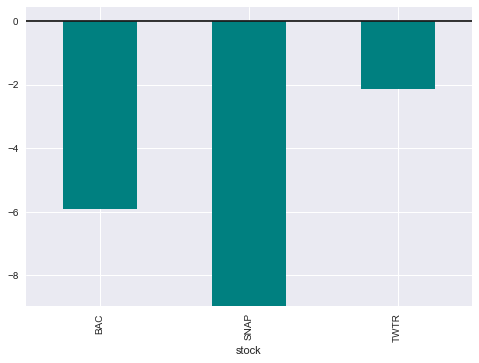

In [7]:
master_data['profit'].plot(kind='bar', color= 'teal'); plt.axhline(0, color='k')

In [8]:
profit = 0
for stock in master_data.index:
    profit += master_data.at[str(stock), 'profit']
    if (master_data.at[str(stock), 'profit'] > 0): 
        print (stock)
        
if profit < 0: print ('rip, you have a negative portfolio')
print ('expected profit: ', profit)

rip, you have a negative portfolio
expected profit:  -17.024
